In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv("kidney.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [5]:
df.drop('id',axis=1,inplace=True)
df = df.dropna(axis=0)

In [6]:
cols = ['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc']
X = df[cols]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=44, stratify= y)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(105, 7), y:(105,)
Shape test set: X:(53, 7), y:(53,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [8]:
training_accuracy = []
testing_accuracy = []

# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
training_accuracy.append(model_rf.score(X_train,y_train))
testing_accuracy.append(model_rf.score(X_test, y_test))

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
training_accuracy.append(model_lr.score(X_train,y_train))
testing_accuracy.append(model_lr.score(X_test, y_test))

# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
training_accuracy.append(model_dt.score(X_train,y_train))
testing_accuracy.append(model_dt.score(X_test, y_test))

# K-Nearest Neighbor
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
training_accuracy.append(model_knn.score(X_train,y_train))
testing_accuracy.append(model_knn.score(X_test, y_test))

# Support Vector Machine
model_svc = SVC()
model_svc.fit(X_train, y_train)
training_accuracy.append(model_svc.score(X_train,y_train))
testing_accuracy.append(model_svc.score(X_test, y_test))

Algorithms = ['Random Forest', 'Logistic', 'Decision Tree', 'KNN', 'SVM']


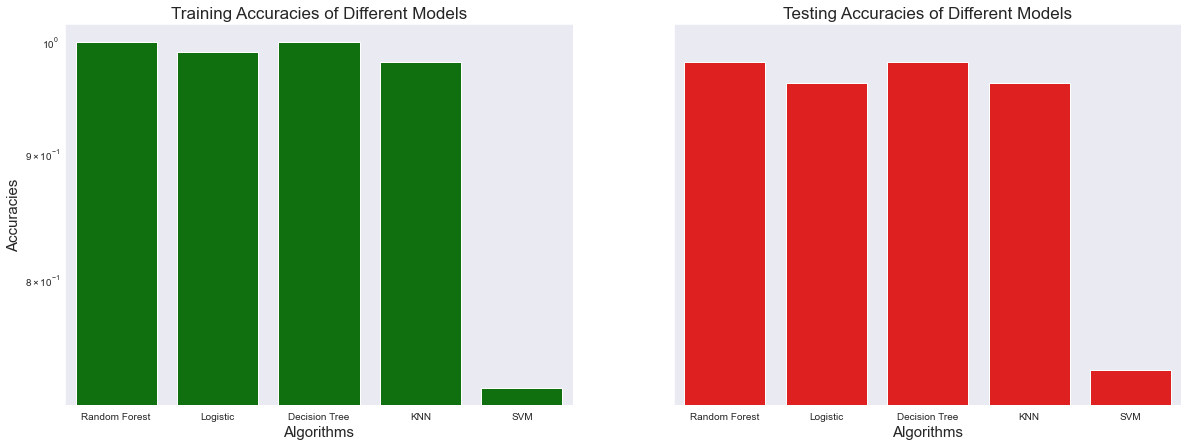

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
fig, axes = plt.subplots(1,2,figsize= (20,7), sharey=True)
plt.semilogy()
sns.barplot(x = Algorithms, y = training_accuracy, ax=axes[0], color='g')
axes[0].set_title('Training Accuracies of Different Models', fontsize=17)
axes[0].set_xlabel('Algorithms', fontsize=15)
axes[0].set_ylabel('Accuracies', fontsize=15)
sns.barplot(x=Algorithms, y=testing_accuracy, ax=axes[1], color='r')
axes[1].set_title('Testing Accuracies of Different Models', fontsize=17)
axes[1].set_xlabel('Algorithms', fontsize=15)
plt.savefig('cancer_models.png',transparent=False)
plt.show()

In [10]:
t_df = pd.DataFrame(data= {'Training_Accuracy': training_accuracy, 'Testing_Accuracy': testing_accuracy}, index=Algorithms)
t_df.head()

,Training_Accuracy,Testing_Accuracy
Random Forest,1.000000,0.981132
Logistic,0.990476,0.962264
Decision Tree,1.000000,0.981132
KNN,0.980952,0.962264
SVM,0.723810,0.735849


In [11]:
# Saving the model
from sklearn.externals import joblib
 # Save the model as a pickle in a file
joblib.dump(model_rf, 'kidney_model.pkl')

c:\users\susant\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['kidney_model.pkl']

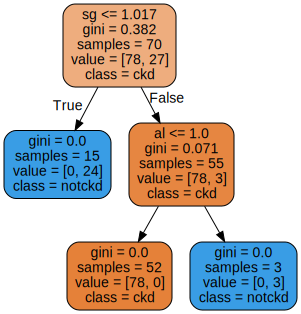

In [12]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model_rf.estimators_[20], 
                           feature_names=X.columns,
                           class_names=['ckd', 'notckd'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [13]:
graph.render()

'Source.gv.png'

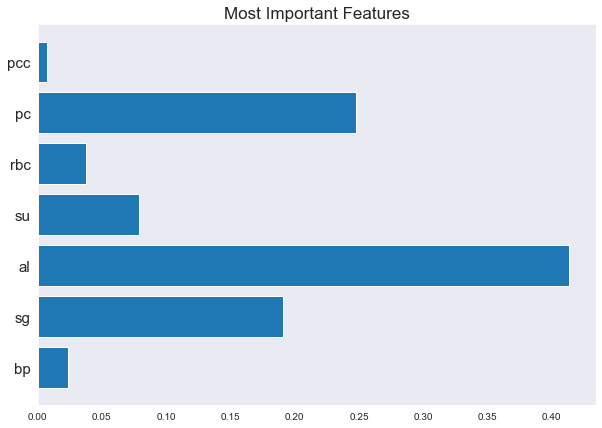

In [14]:
plt.figure(figsize=(10,7))
plt.barh(y=X.columns, width=model_rf.feature_importances_)
plt.title('Most Important Features', fontsize=17)
plt.yticks(fontsize=15)
plt.savefig('features_importance.png', transparent=False)
plt.show()